# 1.read the data

Mainly read the data and to check if the reading is right.
Then carefully check the meaning of every columns and lines.

1) read the updated data,downloaded from http://asteroids.matf.bg.ac.rs/fam/properelements.php

2) read the family data according to the paper'Identification and Dynamical Properties of Asteroid Famili
    es' from https://sbn.psi.edu/pds/resource/nesvornyfam.html

In [126]:
import os
import csv
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

proper2018_num = pd.read_csv('proper2018_num.pro',sep = '\s+',header = None,nrows=None,
                        index_col=None,names = ['name','H','a','e','sini','n','g','s','LCE','My'])
proper2018_num.index=[str(i) for i in proper2018_num['name']]
print(len(proper2018_num),proper2018_num.shape)

proper2018_multi = pd.read_csv('proper2018_multi.pro',sep = '\s+',header = None,nrows=None,
                        index_col=None,names = ['name','H','a','e','sini','n','g','s','LCE','My'])
proper2018_multi.index=[str(i) for i in proper2018_multi['name']]
print(len(proper2018_multi),proper2018_multi.shape)

proper2018_numulti = pd.concat([proper2018_num,proper2018_multi],join='outer')
print(len(proper2018_numulti),proper2018_numulti.shape)

507449 (507449, 10)
123777 (123777, 10)
631226 (631226, 10)


In [127]:
proper2018_numulti.index = [str(i) for i in proper2018_numulti['name']]

In [128]:
proper2018_num.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
1,1,3.44,2.767092,0.115350,0.167737,78.194564,54.251351,-59.251439,185.2,-10
2,2,4.11,2.770601,0.280881,0.547176,78.055664,-1.285104,-46.519068,10.1,-10
3,3,5.37,2.669387,0.233766,0.229454,82.528341,43.850318,-61.479182,65.8,-10


In [129]:
proper2018_num.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
523582,523582,17.81,1.923656,0.045857,0.375945,134.923897,13.727629,-21.643117,54.1,-10
523583,523583,18.27,2.127095,0.122123,0.059187,116.101154,30.445241,-32.933998,11.0,-10
523584,523584,17.07,2.579421,0.261539,0.221122,86.885101,43.375502,-59.735011,15.2,-10


In [130]:
proper2018_multi.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
1977RS,1977RS,16.76,2.545867,0.255023,0.059430,88.606818,57.792026,-63.087096,9.8,-10
1981EN35,1981EN35,17.47,2.378146,0.258151,0.198991,98.187609,34.132572,-47.649532,5.2,-10
1990XD1,1990XD1,17.06,2.777411,0.318808,0.449407,77.765558,16.249534,-59.892877,11.0,-10


In [131]:
proper2018_multi.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
2018RZ21,2018RZ21,18.90,2.326078,0.143484,0.099615,101.464274,36.157099,-39.962988,500.0,-10
2018SW,2018SW,18.16,2.541403,0.251059,0.265047,88.844454,42.956603,-54.755963,16.0,-10
6331P-L,6331P-L,18.52,2.334661,0.239765,0.132309,100.895582,35.743018,-45.550710,9.4,-10


In [132]:
proper2018_numulti.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
1,1,3.44,2.767092,0.115350,0.167737,78.194564,54.251351,-59.251439,185.2,-10
2,2,4.11,2.770601,0.280881,0.547176,78.055664,-1.285104,-46.519068,10.1,-10
3,3,5.37,2.669387,0.233766,0.229454,82.528341,43.850318,-61.479182,65.8,-10


In [133]:
proper2018_numulti.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
2018RZ21,2018RZ21,18.90,2.326078,0.143484,0.099615,101.464274,36.157099,-39.962988,500.0,-10
2018SW,2018SW,18.16,2.541403,0.251059,0.265047,88.844454,42.956603,-54.755963,16.0,-10
6331P-L,6331P-L,18.52,2.334661,0.239765,0.132309,100.895582,35.743018,-45.550710,9.4,-10


In [134]:
np2018all = proper2018_numulti
np2018all.shape

(631226, 10)

In [136]:
chaldaea = pd.read_csv('./DNfamilies2015/415_chaldaea.tab',names=['name','a','e','sini','H','dont know','fn','banumber','BAN'],
                              index_col=None,skiprows=None,sep='\s+')
chaldaea.index=[str(i) for i in chaldaea['name']]

In [137]:
chaldaea.shape

(132, 9)

In [138]:
chaldaea.head(3)

,name,a,e,sini,H,dont know,fn,banumber,BAN
313,313,2.37584,0.23250,0.20397,9.01,0.00,415,313,Chaldaea
1386,1386,2.36472,0.23555,0.19396,13.29,-0.24,415,313,Chaldaea
5333,5333,2.34550,0.22644,0.20218,12.94,-0.78,415,313,Chaldaea


In [139]:
chaldaea.tail(3)

,name,a,e,sini,H,dont know,fn,banumber,BAN
350813,350813,2.38154,0.23281,0.20354,17.41,0.02,415,313,Chaldaea
361131,361131,2.35117,0.23059,0.19801,17.55,-0.08,415,313,Chaldaea
361193,361193,2.45777,0.22155,0.18992,17.66,0.24,415,313,Chaldaea


In [140]:
def plot_ae(data,s=1):
    plt.xlabel('Proper semimajor-axis [AU]')
    plt.ylabel('Proper eccentricity')
    plt.scatter(data['a'],data['e'],s=s)
    plt.show()

In [141]:
def plot_asini(data,s=1):
    plt.xlabel('Proper semimajor-axis [AU]')
    plt.ylabel('Sin of proper incline')
    plt.scatter(data['a'],data['sini'],s=s)
    plt.show()

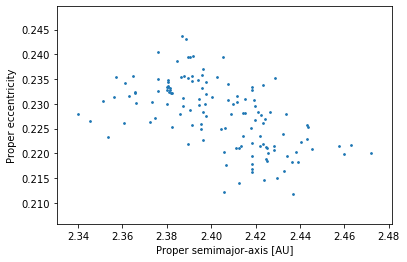

In [142]:
plot_ae(chaldaea,s=3)

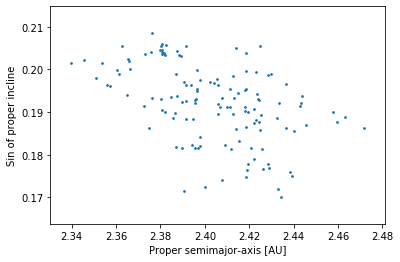

In [143]:
plot_asini(chaldaea,s=3)

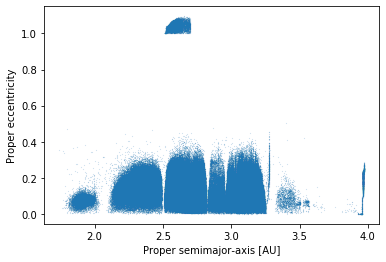

In [64]:
plot_ae(np2018all,s=0.005)

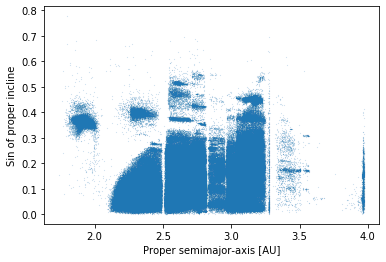

In [65]:
plot_asini(np2018all,s=0.005)

In [144]:
def min_max(data):
    print('a:',min(data['a']),max(data['a']))
    print('e:',min(data['e']),max(data['e']))    
    print('sini:',min(data['sini']),max(data['sini']))

In [26]:
min_max(chaldaea)

a: 2.3399 2.4718299999999997
e: 0.21174 0.24372
sini: 0.17012 0.20848000000000003


# 2.select the data

Select the data of specific family,to simplify the type of the code,it is much better to difine functions.In order to contain the asteroids near the family edge,when select the data,+0.01 and -0.01 to the edge a,e,sin(i)(sini for short,the change of value based on the round 3 decimals of the orginal data) of the family

In [27]:
np2018all = proper2018_numulti

In [28]:
def select_data(od,min_a=2.26,max_a=2.49,min_e=0.06,max_e=0.25,min_sini=0,max_sini=1):
    data=od[(od['a']>min_a)&(od['a']<max_a)&(od['e']>min_e)&(od['e']<max_e)&(od['sini']>min_sini)&(od['sini']<max_sini)]
    return data

In [145]:
data_range_chaldaea=select_data(od=np2018all,min_a=2.31,max_a=2.50,min_e=0.18,max_e=0.27,min_sini=0.14,max_sini=0.24)

In [146]:
data_range_chaldaea.shape

(5223, 10)

In [147]:
data_range_chaldaea.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
84,84,9.36,2.362203,0.193565,0.164487,99.144855,35.070364,-43.070681,33.1,-10
115,115,7.60,2.379906,0.180022,0.218038,98.040897,32.492843,-41.905159,37.7,-10
220,220,11.20,2.348712,0.203634,0.156290,100.001609,35.049306,-43.250055,35.8,-10


In [148]:
data_range_chaldaea.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
2018PE,2018PE,17.11,2.431677,0.220196,0.154532,94.925921,38.931977,-48.447680,27.1,-10
2018PS11,2018PS11,17.91,2.339857,0.194036,0.205698,100.567642,32.120248,-41.415043,27.5,-10
2018RN14,2018RN14,17.12,2.449287,0.233595,0.195156,93.902078,38.481655,-49.393093,14.0,-10


# 3.Calculate the distance metrics and clustering

1) Use the formula from 'Identification and Dynamical Properties of Asteroid Families' 
   to calculate the distance metrics 

2) Use python AgglomerativeClustering algrithm to cluster,and write the result to memory

In [149]:
#to calculate the distence metrics

t0_distance_metrics = time.time()

part_name = data_range_chaldaea                        #select the data based on the range of a,e,sini
len_clustering = len(part_name)                 #asteroid numbers to calculate the distance metrics
destance_metric = np.zeros((len_clustering,len_clustering))
distance_metrics = pd.DataFrame(destance_metric,index=part_name.index,columns=part_name.index)

n = 0
for i in distance_metrics.index:
    n += 1
    if n%200==0:
        print(n)
    for m in distance_metrics.columns:  #calculate the distance between every pairs of asteroids within the data  
        d = round(82.7935*part_name['n'][i]*part_name['a'][i]*(1.25*((part_name['a'][i]-part_name['a'][m])/((part_name['a'][i]+part_name['a'][m])/2))**2+
                        2*(part_name['e'][i]-part_name['e'][m])** 2 + 2*(part_name['sini'][i]-part_name['sini'][m])**2)**0.5,2)
        distance_metrics.loc[i,m] = d    #calculate and fill the value into the distance metrics
t_distance_metrics = time.time() - t0_distance_metrics

print('Total number of asteroids for clustering: %i '%len(distance_metrics))
print('Time for distance_metrics: %.3f s'%t_distance_metrics)

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
Total number of asteroids for clustering: 5223 
Time for distance_metrics: 6823.948 s


In [153]:
#Save the result of distance_metrics to memory
family_name='Chaldaea_family'
path=os.getcwd()+'/distance_metrics'
if not os.path.exists(path):
    os.mkdir(path)
    
distance_metrics.to_csv(path+'/dm_{}.csv'.format(family_name), sep=',', na_rep='', float_format='%.2f', 
                        columns=None, header=True,index=True, index_label=None,encoding=None)

In [150]:
#AgglomerativeClustering based on the distance metrics

def cluster_the_data(distance_metrics,linkage = "single",range_min=0,range_max=10,range_name='data_range_sc'):
   
    for distance_threshold in range(range_min,range_max,1):
        print(distance_threshold)
        
        clustering = AgglomerativeClustering(linkage=linkage,n_clusters=None,affinity='precomputed',memory=None,
                                         distance_threshold=distance_threshold,compute_full_tree=True).fit(distance_metrics)
        clusters_with_label = pd.DataFrame(pd.Series(clustering.labels_).value_counts(),columns=['labels_count'])

        data_with_labels = pd.DataFrame(pd.Series(clustering.labels_,index = distance_metrics.index),columns=['labels'])  

        labels = np.unique(clustering.labels_)

        data = np2018all                         
 
        list_label = locals()                         #list with same label 
        
        path = os.getcwd()+'/{}/{}{}'.format(range_name,range_name,str(distance_threshold))
        if os.path.exists(path) is False:
            os.makedirs(path)
            
            for i in labels:
                list_label['cluster' + str(i)] = pd.DataFrame()
                label_index = data_with_labels[data_with_labels['labels'] == i].index #samples with the same label
                for m in label_index:
                    list_label['cluster' + str(i)] = list_label['cluster' + str(i)].append(data.loc[m])

                cluster_name = list_label['cluster' + str(i)]['H'].idxmin()   
                list_label['cluster' + str(i)].to_csv(path+'/cluster{}.csv'.format(cluster_name), 
                           sep=',', na_rep='', float_format='%.7f', columns=['H','a','e','sini','n','g','s','LCE','My'], header=True,
                           index=True, index_label=None,encoding=None)

    return clustering,clusters_with_label,data_with_labels
            

In [151]:
t0_label = time.time()
cluster_the_data(distance_metrics,linkage = "single",range_min=0,range_max=201,range_name='data_range_chaldaea')
t_label = time.time() - t0_label
print('Time for save cluster data by labels:',t_label)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
Time for save cluster data by labels: 5176.2533576488495


In [154]:
#count clusters sum in different distance_threshold

def clusters_count(range_name='inner17',range_min=0,range_max=300):
   
    cluster_ = locals()

    f = open('./output/{}_clusters_count.csv'.format(range_name),'w',encoding='utf-8')
    csv_writer = csv.writer(f)

    for i in range(range_min,range_max,1):
        path = './{}/{}'.format(range_name,range_name)+str(i)
        cluster_[str(i)] = os.listdir(path)
        clusters_count = len(cluster_[str(i)])
        print(range_name+str(i),i,clusters_count)
        csv_writer.writerow([range_name+str(i),i,clusters_count])
    f.close
    print('Write done')

In [155]:
clusters_count(range_name='data_range_chaldaea',range_min=0,range_max=201)

data_range_chaldaea0 0 5223
data_range_chaldaea1 1 5223
data_range_chaldaea2 2 5223
data_range_chaldaea3 3 5221
data_range_chaldaea4 4 5215
data_range_chaldaea5 5 5207
data_range_chaldaea6 6 5204
data_range_chaldaea7 7 5198
data_range_chaldaea8 8 5185
data_range_chaldaea9 9 5175
data_range_chaldaea10 10 5158
data_range_chaldaea11 11 5147
data_range_chaldaea12 12 5136
data_range_chaldaea13 13 5126
data_range_chaldaea14 14 5116
data_range_chaldaea15 15 5101
data_range_chaldaea16 16 5080
data_range_chaldaea17 17 5066
data_range_chaldaea18 18 5052
data_range_chaldaea19 19 5036
data_range_chaldaea20 20 5023
data_range_chaldaea21 21 5006
data_range_chaldaea22 22 4989
data_range_chaldaea23 23 4974
data_range_chaldaea24 24 4951
data_range_chaldaea25 25 4928
data_range_chaldaea26 26 4902
data_range_chaldaea27 27 4876
data_range_chaldaea28 28 4858
data_range_chaldaea29 29 4828
data_range_chaldaea30 30 4805
data_range_chaldaea31 31 4783
data_range_chaldaea32 32 4745
data_range_chaldaea33 33 4721


In [156]:
range_name='data_range_chaldaea'
clusters_count = pd.read_csv('./output/{}_clusters_count.csv'.format(range_name),index_col=None,sep=',',
                         names=['range_name','distance_threshold','clusters_number'])
print(len(clusters_count))

201


In [40]:
clusters_count.head(2)

,range_name,distance_threshold,clusters_number
0,data_range_chaldaea0,0,1942
1,data_range_chaldaea1,1,1942


In [41]:
clusters_count.tail(2)

,range_name,distance_threshold,clusters_number
199,data_range_chaldaea199,199,7
200,data_range_chaldaea200,200,6


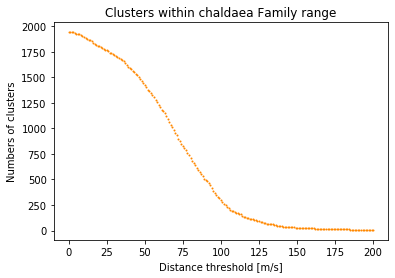

In [42]:
plt.xlabel('Distance threshold [m/s]')
plt.ylabel('Numbers of clusters')
plt.title('Clusters within chaldaea Family range')
plt.scatter(clusters_count['distance_threshold'],clusters_count['clusters_number'],c='#FF8800',s=1)
plt.savefig('./image/{}_clusters_count.jpg'.format(range_name),dpi=720)
plt.show()

# 4.Compare the results 

Compare the results from python AgglomerativeClustering algrithm with the results from the paper 'Identification and Dynamical Properties of Asteroid Families'.Becuase the rules to judge whether one cluster is a meaningful family based on the law from broken events and solar system dynamics is not so clear.So the compare based on the results of the paper.

1) For Chaldaea family,count the numbers of asteroids in different distance_shreshold(from 0 to 200).The variable name of family from my result is cluster313(313 is the number of asteroid Chaldaea).

2) Use the same distance_shreshold with DNfamily in the paper,to count the number of numbered asteroids and the number of multi-opposition asteroids in my results.

3) Research the asteroids in DNfamily but not in my results with the same distance_threshold.And the variable name of family from DNfamilies is clarissa.

4) Research the asteroids in my results but not in DNfamily with the same distance_threshold.


### 1) Count the numbers of asteroids in different distance_shreshold


In [43]:
def cluster_count(cluster_name='cluster25.csv',range_name='data_range_sc_average',rmin=0,rmax=201):
    f = open('./output/{}_count_{}'.format(range_name,cluster_name),'w',encoding='utf-8')
    csv_writer = csv.writer(f)
    for i in range(rmin,rmax,1):
        path = os.getcwd()+'/{}/{}{}'.format(range_name,range_name,str(i))+'/'+cluster_name
        if os.path.exists(path) is True:
            data = pd.read_csv(path,index_col=0,header=0)
            csv_writer.writerow([cluster_name,range_name+str(i),i,len(data)])
            print([cluster_name,range_name+str(i),i,len(data)])
    f.close
    print('Write done')

In [44]:
cluster_count(cluster_name='cluster313.csv',range_name='data_range_chaldaea')

['cluster313.csv', 'data_range_chaldaea0', 0, 1]
['cluster313.csv', 'data_range_chaldaea1', 1, 1]
['cluster313.csv', 'data_range_chaldaea2', 2, 1]
['cluster313.csv', 'data_range_chaldaea3', 3, 1]
['cluster313.csv', 'data_range_chaldaea4', 4, 1]
['cluster313.csv', 'data_range_chaldaea5', 5, 1]
['cluster313.csv', 'data_range_chaldaea6', 6, 1]
['cluster313.csv', 'data_range_chaldaea7', 7, 1]
['cluster313.csv', 'data_range_chaldaea8', 8, 1]
['cluster313.csv', 'data_range_chaldaea9', 9, 2]
['cluster313.csv', 'data_range_chaldaea10', 10, 2]
['cluster313.csv', 'data_range_chaldaea11', 11, 2]
['cluster313.csv', 'data_range_chaldaea12', 12, 2]
['cluster313.csv', 'data_range_chaldaea13', 13, 3]
['cluster313.csv', 'data_range_chaldaea14', 14, 3]
['cluster313.csv', 'data_range_chaldaea15', 15, 3]
['cluster313.csv', 'data_range_chaldaea16', 16, 3]
['cluster313.csv', 'data_range_chaldaea17', 17, 5]
['cluster313.csv', 'data_range_chaldaea18', 18, 5]
['cluster313.csv', 'data_range_chaldaea19', 19, 5]


In [45]:
cluster_name='cluster313.csv';range_name='data_range_chaldaea'

In [47]:
count_cluster313 = pd.read_csv('./output/{}_count_{}'.format(range_name,cluster_name),
                                names=['subfamily_name','eunomia','distance_threshold','asteroid_number'])
print(count_cluster313.shape)

(93, 4)


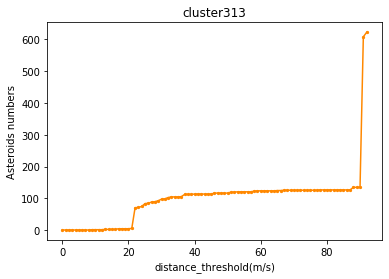

In [69]:
plot_name = count_cluster313 #select the cluster to plot
cluster_name='cluster313.csv';range_name='data_range_chaldaea'

plt.xlabel('distance_threshold(m/s)')
plt.ylabel('Asteroids numbers')
plt.title('{}'.format(cluster_name[:-4]))
plt.scatter(plot_name['distance_threshold'],plot_name['asteroid_number'],c='#FF8800',s=5)
plt.plot(plot_name['distance_threshold'],plot_name['asteroid_number'],c='#FF8800')
plt.savefig('./image/{}_count_{}.jpg'.format(range_name,cluster_name[:-4]),dpi=720)
plt.show()

In [51]:
#To find where the asteroid is

def find_asteroid(range_name='data_range_sulamitis',asteroid='40407',rmin=0,rmax=201):

    f = open('./output/{}_find_{}'.format(range_name,asteroid),'w',encoding='utf-8')
    csv_writer = csv.writer(f)

    for i in range(rmin,rmax,1):
        path = os.getcwd()+'/{}/{}{}'.format(range_name,range_name,str(i))
        for cluster in os.listdir(path):
            data = pd.read_csv(path+'/'+cluster,sep = ',',header = None,nrows=None,skiprows=1,
                        index_col=None,names = ['name','H','a','e','sini','n','g','s','LCE','My'])
            data.index=[str(i) for i in data['name']]
            
            if asteroid in data.index:
                csv_writer.writerow([asteroid,cluster,len(data),range_name+str(i),i])
                print([asteroid,cluster,len(data),range_name+str(i),i])
    f.close()

In [52]:
find_asteroid(range_name='data_range_chaldaea',asteroid='313',rmin=0,rmax=201)

['313', 'cluster313.csv', 1, 'data_range_chaldaea0', 0]
['313', 'cluster313.csv', 1, 'data_range_chaldaea1', 1]
['313', 'cluster313.csv', 1, 'data_range_chaldaea2', 2]
['313', 'cluster313.csv', 1, 'data_range_chaldaea3', 3]
['313', 'cluster313.csv', 1, 'data_range_chaldaea4', 4]
['313', 'cluster313.csv', 1, 'data_range_chaldaea5', 5]
['313', 'cluster313.csv', 1, 'data_range_chaldaea6', 6]
['313', 'cluster313.csv', 1, 'data_range_chaldaea7', 7]
['313', 'cluster313.csv', 1, 'data_range_chaldaea8', 8]
['313', 'cluster313.csv', 2, 'data_range_chaldaea9', 9]
['313', 'cluster313.csv', 2, 'data_range_chaldaea10', 10]
['313', 'cluster313.csv', 2, 'data_range_chaldaea11', 11]
['313', 'cluster313.csv', 2, 'data_range_chaldaea12', 12]
['313', 'cluster313.csv', 3, 'data_range_chaldaea13', 13]
['313', 'cluster313.csv', 3, 'data_range_chaldaea14', 14]
['313', 'cluster313.csv', 3, 'data_range_chaldaea15', 15]
['313', 'cluster313.csv', 3, 'data_range_chaldaea16', 16]
['313', 'cluster313.csv', 5, 'data

['313', 'cluster2010PO22.csv', 1850, 'data_range_chaldaea133', 133]
['313', 'cluster2010PO22.csv', 1850, 'data_range_chaldaea134', 134]
['313', 'cluster2010PO22.csv', 1852, 'data_range_chaldaea135', 135]
['313', 'cluster2010PO22.csv', 1862, 'data_range_chaldaea136', 136]
['313', 'cluster2010PO22.csv', 1865, 'data_range_chaldaea137', 137]
['313', 'cluster2010PO22.csv', 1867, 'data_range_chaldaea138', 138]
['313', 'cluster2010PO22.csv', 1876, 'data_range_chaldaea139', 139]
['313', 'cluster2010PO22.csv', 1883, 'data_range_chaldaea140', 140]
['313', 'cluster2010PO22.csv', 1888, 'data_range_chaldaea141', 141]
['313', 'cluster2010PO22.csv', 1888, 'data_range_chaldaea142', 142]
['313', 'cluster2010PO22.csv', 1888, 'data_range_chaldaea143', 143]
['313', 'cluster2010PO22.csv', 1891, 'data_range_chaldaea144', 144]
['313', 'cluster2010PO22.csv', 1891, 'data_range_chaldaea145', 145]
['313', 'cluster2010PO22.csv', 1892, 'data_range_chaldaea146', 146]
['313', 'cluster2010PO22.csv', 1892, 'data_range

In [73]:
find_asteroid(range_name='data_range_chaldaea',asteroid='2010PO22',rmin=0,rmax=201)

['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea0', 0]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea1', 1]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea2', 2]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea3', 3]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea4', 4]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea5', 5]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea6', 6]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea7', 7]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea8', 8]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea9', 9]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea10', 10]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea11', 11]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea12', 12]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea13', 13]
['2010PO22', 'cluster2010PO22.csv', 1, 'data_range_chaldaea14', 14]


['2010PO22', 'cluster2010PO22.csv', 1670, 'data_range_chaldaea121', 121]
['2010PO22', 'cluster2010PO22.csv', 1670, 'data_range_chaldaea122', 122]
['2010PO22', 'cluster2010PO22.csv', 1680, 'data_range_chaldaea123', 123]
['2010PO22', 'cluster2010PO22.csv', 1683, 'data_range_chaldaea124', 124]
['2010PO22', 'cluster2010PO22.csv', 1720, 'data_range_chaldaea125', 125]
['2010PO22', 'cluster2010PO22.csv', 1806, 'data_range_chaldaea126', 126]
['2010PO22', 'cluster2010PO22.csv', 1817, 'data_range_chaldaea127', 127]
['2010PO22', 'cluster2010PO22.csv', 1834, 'data_range_chaldaea128', 128]
['2010PO22', 'cluster2010PO22.csv', 1840, 'data_range_chaldaea129', 129]
['2010PO22', 'cluster2010PO22.csv', 1843, 'data_range_chaldaea130', 130]
['2010PO22', 'cluster2010PO22.csv', 1846, 'data_range_chaldaea131', 131]
['2010PO22', 'cluster2010PO22.csv', 1848, 'data_range_chaldaea132', 132]
['2010PO22', 'cluster2010PO22.csv', 1850, 'data_range_chaldaea133', 133]
['2010PO22', 'cluster2010PO22.csv', 1850, 'data_ran

In [74]:
cluster_count(cluster_name='cluster2010PO22.csv',range_name='data_range_chaldaea')

['cluster2010PO22.csv', 'data_range_chaldaea0', 0, 1]
['cluster2010PO22.csv', 'data_range_chaldaea1', 1, 1]
['cluster2010PO22.csv', 'data_range_chaldaea2', 2, 1]
['cluster2010PO22.csv', 'data_range_chaldaea3', 3, 1]
['cluster2010PO22.csv', 'data_range_chaldaea4', 4, 1]
['cluster2010PO22.csv', 'data_range_chaldaea5', 5, 1]
['cluster2010PO22.csv', 'data_range_chaldaea6', 6, 1]
['cluster2010PO22.csv', 'data_range_chaldaea7', 7, 1]
['cluster2010PO22.csv', 'data_range_chaldaea8', 8, 1]
['cluster2010PO22.csv', 'data_range_chaldaea9', 9, 1]
['cluster2010PO22.csv', 'data_range_chaldaea10', 10, 1]
['cluster2010PO22.csv', 'data_range_chaldaea11', 11, 1]
['cluster2010PO22.csv', 'data_range_chaldaea12', 12, 1]
['cluster2010PO22.csv', 'data_range_chaldaea13', 13, 1]
['cluster2010PO22.csv', 'data_range_chaldaea14', 14, 1]
['cluster2010PO22.csv', 'data_range_chaldaea15', 15, 1]
['cluster2010PO22.csv', 'data_range_chaldaea16', 16, 1]
['cluster2010PO22.csv', 'data_range_chaldaea17', 17, 1]
['cluster201

['cluster2010PO22.csv', 'data_range_chaldaea154', 154, 1910]
['cluster2010PO22.csv', 'data_range_chaldaea155', 155, 1913]
['cluster2010PO22.csv', 'data_range_chaldaea156', 156, 1914]
['cluster2010PO22.csv', 'data_range_chaldaea157', 157, 1915]
['cluster2010PO22.csv', 'data_range_chaldaea158', 158, 1915]
['cluster2010PO22.csv', 'data_range_chaldaea159', 159, 1916]
['cluster2010PO22.csv', 'data_range_chaldaea160', 160, 1916]
['cluster2010PO22.csv', 'data_range_chaldaea161', 161, 1916]
['cluster2010PO22.csv', 'data_range_chaldaea162', 162, 1920]
['cluster2010PO22.csv', 'data_range_chaldaea163', 163, 1921]
['cluster2010PO22.csv', 'data_range_chaldaea164', 164, 1922]
['cluster2010PO22.csv', 'data_range_chaldaea165', 165, 1922]
['cluster2010PO22.csv', 'data_range_chaldaea166', 166, 1922]
['cluster2010PO22.csv', 'data_range_chaldaea167', 167, 1923]
['cluster2010PO22.csv', 'data_range_chaldaea168', 168, 1923]
['cluster2010PO22.csv', 'data_range_chaldaea169', 169, 1923]
['cluster2010PO22.csv', 

In [76]:
range_name='data_range_chaldaea';cluster_name='cluster2010PO22.csv'
count_cluster2010PO22 = pd.read_csv('./output/{}_count_{}'.format(range_name,cluster_name),
                                names=['subfamily_name','eunomia','distance_threshold','asteroid_number'])
print(count_cluster2010PO22.shape)

(201, 4)


In [78]:
count_cluster2010PO22.head(3)

,subfamily_name,eunomia,distance_threshold,asteroid_number
0,cluster2010PO22.csv,data_range_chaldaea0,0,1
1,cluster2010PO22.csv,data_range_chaldaea1,1,1
2,cluster2010PO22.csv,data_range_chaldaea2,2,1


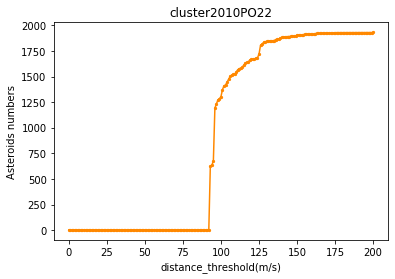

In [77]:
#Note that the truth is 2010PO22 merged into cluster313,not cluster313 merged into cluster2010PO22,
#so,just concat the data after the asteroid merged into cluster313 named cluster2010PO22
plot_name = count_cluster2010PO22 #select the cluster to plot
cluster_name='cluster2010PO22.csv';range_name='data_range_chaldaea'

plt.xlabel('distance_threshold(m/s)')
plt.ylabel('Asteroids numbers')
plt.title('{}'.format(cluster_name[:-4]))
plt.scatter(plot_name['distance_threshold'],plot_name['asteroid_number'],c='#FF8800',s=5)
plt.plot(plot_name['distance_threshold'],plot_name['asteroid_number'],c='#FF8800')
plt.savefig('./image/{}_count_{}.jpg'.format(range_name,cluster_name[:-4]),dpi=720)
plt.show()

In [79]:
count_cluster2010PO22=count_cluster2010PO22[count_cluster2010PO22['distance_threshold']>=93]

In [81]:
count_cluster313=pd.concat([count_cluster313,count_cluster2010PO22])

In [82]:
count_cluster313.head(3)

,subfamily_name,eunomia,distance_threshold,asteroid_number
0,cluster313.csv,data_range_chaldaea0,0,1
1,cluster313.csv,data_range_chaldaea1,1,1
2,cluster313.csv,data_range_chaldaea2,2,1


In [83]:
count_cluster313.tail(3)

,subfamily_name,eunomia,distance_threshold,asteroid_number
198,cluster2010PO22.csv,data_range_chaldaea198,198,1930
199,cluster2010PO22.csv,data_range_chaldaea199,199,1930
200,cluster2010PO22.csv,data_range_chaldaea200,200,1932


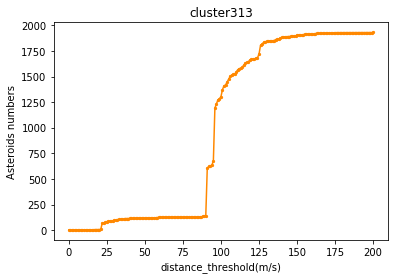

In [84]:
plot_name = count_cluster313 #select the cluster to plot
cluster_name='cluster313.csv';range_name='data_range_chaldaea'

plt.xlabel('distance_threshold(m/s)')
plt.ylabel('Asteroids numbers')
plt.title('{}'.format(cluster_name[:-4]))
plt.scatter(plot_name['distance_threshold'],plot_name['asteroid_number'],c='#FF8800',s=5)
plt.plot(plot_name['distance_threshold'],plot_name['asteroid_number'],c='#FF8800')
plt.savefig('./image/{}_count_{}.jpg'.format(range_name,cluster_name[:-4]),dpi=720)
plt.show()

### 2) Count the numbered and the multi-opposition asteroids in my results

In [85]:
range_name='data_range_chaldaea';cluster_name='cluster2010PO22.csv';d=130
path = os.getcwd()+'/{}/{}{}'.format(range_name,range_name,str(d))
cluster313 = pd.read_csv(path+'/'+cluster_name,sep = ',',header = None,nrows=None,skiprows=1,
                        index_col=None,names = ['name','H','a','e','sini','n','g','s','LCE','My'])
cluster313.index=[str(i) for i in cluster313['name']]
print(cluster313.shape)

(1843, 10)


In [86]:
cluster313.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
313,313,9.07,2.375995,0.232644,0.204209,98.286386,33.599937,-45.431616,15.8,-10.0
724,724,13.89,2.455457,0.240730,0.199480,93.553668,39.450176,-50.274701,10.4,-10.0
1278,1278,10.86,2.405217,0.213211,0.174788,96.496653,36.310415,-46.108110,42.2,-10.0


In [87]:
cluster313.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
2017XN6,2017XN6,19.78,2.379410,0.207591,0.165190,98.071394,35.756868,-44.716761,32.2,-10.0
2018BK9,2018BK9,17.87,2.463524,0.221647,0.192942,93.089635,40.927497,-49.304666,13.7,-10.0
2018RN14,2018RN14,17.12,2.449287,0.233595,0.195156,93.902078,38.481655,-49.393093,14.0,-10.0


In [92]:
#In the results of mine,the data of numbered asteroids

cluster313_num = pd.DataFrame();cluster=cluster313
for i in cluster.index:
    if i.isdigit():
        
        df1 = pd.DataFrame(cluster.loc[i])
        df2 = pd.DataFrame(df1.values.T,index=df1.columns,columns=df1.index)
        cluster313_num=pd.concat([df2,cluster313_num],join='outer')
        
print(cluster313_num.shape)

(1508, 10)


In [93]:
cluster313_num.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
521942,521942,17.95,2.35177,0.210109,0.201426,99.8057,32.8217,-42.9137,37.2,-10
521586,521586,17.52,2.41348,0.231914,0.175295,96.0023,36.8983,-47.923,11.4,-10
516505,516505,17.73,2.43744,0.247764,0.198154,94.5916,37.3424,-49.8714,13.1,-10


In [94]:
cluster313_num.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
1278,1278,10.86,2.40522,0.213211,0.174788,96.4967,36.3104,-46.1081,42.2,-10
724,724,13.89,2.45546,0.24073,0.19948,93.5537,39.4502,-50.2747,10.4,-10
313,313,9.07,2.376,0.232644,0.204209,98.2864,33.5999,-45.4316,15.8,-10


In [95]:
#In the results of mine,the data of multi-opposition asteroids

cluster313_multi = pd.DataFrame();cluster=cluster313
for i in cluster.index:
    if i not in cluster313_num.index:
        
        df1 = pd.DataFrame(cluster.loc[i])
        df2 = pd.DataFrame(df1.values.T,index=df1.columns,columns=df1.index)
        cluster313_multi=pd.concat([df2,cluster313_multi],join='outer')
        
print(cluster313_multi.shape)

(335, 10)


In [96]:
cluster313_multi.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
2018RN14,2018RN14,17.12,2.44929,0.233595,0.195156,93.9021,38.4817,-49.3931,14,-10
2018BK9,2018BK9,17.87,2.46352,0.221647,0.192942,93.0896,40.9275,-49.3047,13.7,-10
2017XN6,2017XN6,19.78,2.37941,0.207591,0.16519,98.0714,35.7569,-44.7168,32.2,-10


In [97]:
cluster313_multi.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
1999UP46,1999UP46,17.24,2.4519,0.225307,0.183077,93.7526,39.3701,-49.1966,17.6,-10
1999KB9,1999KB9,17.04,2.45661,0.220106,0.189622,93.4819,39.5025,-48.8878,18,-10
1999CD139,1999CD139,16.92,2.45217,0.232442,0.160974,93.7361,41.0483,-50.4838,12.5,-10


In [98]:
print(len(cluster313_multi)+len(cluster313_num),len(cluster313))

1843 1843


### 3) Research the asteroids in DNfamily but not in my results with the same distance_threshold

There are two possibility.
First,the asteroid is not within the range of Chaldaea with the +0.01 or -0.01 edge.In this case,the asteroid must be in the data of np2018all which include all the asteroids for their proper orbital elements.
Second,the asteroid is not in the data of my results with the same distance_threshold.But it is within the range of clarissa.It must be there with different distance_threshold,either in the same cluster,or in different cluster.

In [99]:
family=chaldaea;cluster=cluster313
for i in family.index:
    if i not in cluster.index:
        print(i)

In [100]:
len(set(family.index)&set(cluster.index))

132

#### So as above,all the asteroids in DNfamily of Chaldaea is in the result

### 4) Research the asteroids in my results but not in DNfamily with the same distance_threshold.

In [103]:
##find the asteroids in the cluster of my results but not in DNfamily with the same distance_threshold

cluster=cluster313;family=chaldaea
cluster313_Chaldaea=pd.DataFrame()    
for i in cluster.index:
    if i not in family.index:
        df1 = pd.DataFrame(cluster.loc[i])
        df2 = pd.DataFrame(df1.values.T,index=df1.columns,columns=df1.index)
        cluster313_Chaldaea=pd.concat([df2,cluster313_Chaldaea],join='outer')
        
print(len(cluster313_Chaldaea))
print(len(cluster313))

1711
1843


In [104]:
cluster313_Chaldaea.head(3)

,name,H,a,e,sini,n,g,s,LCE,My
2018RN14,2018RN14,17.12,2.44929,0.233595,0.195156,93.9021,38.4817,-49.3931,14,-10
2018BK9,2018BK9,17.87,2.46352,0.221647,0.192942,93.0896,40.9275,-49.3047,13.7,-10
2017XN6,2017XN6,19.78,2.37941,0.207591,0.16519,98.0714,35.7569,-44.7168,32.2,-10


In [105]:
cluster313_Chaldaea.tail(3)

,name,H,a,e,sini,n,g,s,LCE,My
1504,1504,11.65,2.39915,0.201221,0.179127,96.8636,35.8196,-44.9106,21.5,-10
1278,1278,10.86,2.40522,0.213211,0.174788,96.4967,36.3104,-46.1081,42.2,-10
724,724,13.89,2.45546,0.24073,0.19948,93.5537,39.4502,-50.2747,10.4,-10


In [106]:
#In the results of mine with the same distance_threshold,the data of numbered asteroids
#This should be the same with the result as the above cluster302_Clarissa

cluster313_chaldaea_num = pd.DataFrame()
cluster=cluster313;family=chaldaea
for i in cluster.index:
    if i.isdigit():
        if i not in family.index:
            df1 = pd.DataFrame(cluster.loc[i])
            df2 = pd.DataFrame(df1.values.T,index=df1.columns,columns=df1.index)
            cluster313_chaldaea_num=pd.concat([df2,cluster313_chaldaea_num],join='outer')
        
print(cluster313_chaldaea_num.shape)

(1376, 10)


In [107]:
cluster313_num.shape

(1508, 10)

In [109]:
len(cluster313_chaldaea_num)+len(chaldaea)

1508

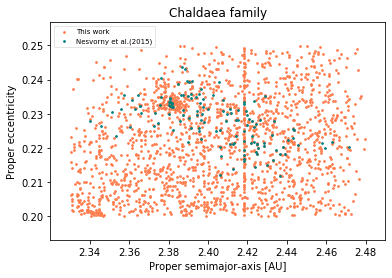

In [114]:
#to plot the a-e fig

cluster=cluster313;DNfamily=chaldaea;family_name='Chaldaea family'
x='a';y='e';xlabel='Proper semimajor-axis [AU]';ylabel='Proper eccentricity';s=3
    
fig,ax=plt.subplots()
    
plt.title(family_name)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
    
cluster_plot=ax.scatter(cluster[x],cluster[y],s=s,c='coral')
family_plot=ax.scatter(DNfamily[x],DNfamily[y],s=s,c='teal')
ax.legend([cluster_plot,family_plot],['This work','Nesvorny et al.(2015)'],fontsize=7,framealpha=0.5,loc='upper left')
plt.savefig('./image/compare_{}_{}{}.jpg'.format(family_name,x,y),dpi=720)
plt.show()

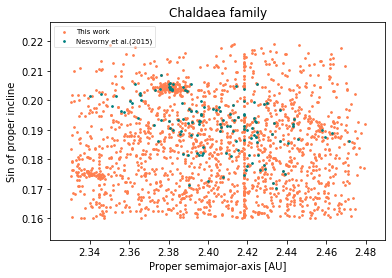

In [115]:
#to plot the a-sini fig

cluster=cluster313;DNfamily=chaldaea;family_name='Chaldaea family'
x='a';y='sini';xlabel='Proper semimajor-axis [AU]';ylabel='Sin of proper incline';s=3
    
fig,ax=plt.subplots()
    
plt.title(family_name)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
    
cluster_plot=ax.scatter(cluster[x],cluster[y],s=s,c='coral')
family_plot=ax.scatter(DNfamily[x],DNfamily[y],s=s,c='teal')
ax.legend([cluster_plot,family_plot],['This work','Nesvorny et al.(2015)'],fontsize=7,framealpha=0.5,loc='upper left')
plt.savefig('./image/compare_{}_{}{}.jpg'.format(family_name,x,y),dpi=720)
plt.show()

# 5.Summarize

In [125]:
print(len(np2018all),len(proper2018_num),len(proper2018_multi))

631226 507449 123777


In [121]:
print(len(cluster313_num),len(cluster313_multi))

1508 335


In [122]:
len(cluster313_num)+len(cluster313_multi)

1843

In [123]:
len(chaldaea)

132

1) The proper elements asteroids in Nesvorny et al.(2015) used to cluster families is 384337,and they are all numbered asteroids based on the data before the calculation.And in this work,the numbers is 631226,contained numbered asteroids 507449,multi-opposition 123777.

2) As for Chaldaea family,In Nesvorny et al.(2015),there 132 numbered asteroids,and in this work,there are 1843 asteroids,1508 numbered,335 multi-opposition with d=130.And all the asteroids in Chaldaea family of Nesvorny et al.(2015) contained in this work with the same d=130.

3) So,the asteroids based on the proper elements of 2018,there are 1508 numbered asteroids more,and 335 multi-opposition asteroids more of the Chaldaea family with d=130.

4) Discuss based on the Visible spectroscopy and Near-infrared spectroscopy,thus the physical characteristics of the face of the asteroid